# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

#Set temperature metric
temp_units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | bernardino de campos
Processing Record 3 of Set 1 | yambio
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | gimli
Processing Record 6 of Set 1 | mys shmidta
Processing Record 7 of Set 1 | deputatskiy
Processing Record 8 of Set 1 | san cristobal
City not found. Skipping...
Processing Record 9 of Set 1 | khatanga
City not found. Skipping...
Processing Record 10 of Set 1 | mount isa
Processing Record 11 of Set 1 | ipixuna
Processing Record 12 of Set 1 | kamenka
Processing Record 13 of Set 1 | lahan
Processing Record 14 of Set 1 | leiva
Processing Record 15 of Set 1 | yurimaguas
City not found. Skipping...
City not found. Skipping...
Processing Record 16 of Set 1 | dunedin
Processing Record 17 of Set 1 | arrecife
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | vao
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | kapaa
Processi

Processing Record 40 of Set 4 | hasaki
Processing Record 41 of Set 4 | chapais
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | newport
Processing Record 45 of Set 4 | saint-leu
Processing Record 46 of Set 4 | evensk
Processing Record 47 of Set 4 | prince rupert
Processing Record 48 of Set 4 | ebolowa
Processing Record 49 of Set 4 | carnarvon
City not found. Skipping...
Processing Record 1 of Set 5 | upernavik
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | ejido
Processing Record 4 of Set 5 | zyryanka
Processing Record 5 of Set 5 | puerto ayora
Processing Record 6 of Set 5 | nyaunglebin
Processing Record 7 of Set 5 | lata
Processing Record 8 of Set 5 | erenhot
Processing Record 9 of Set 5 | onguday
Processing Record 10 of Set 5 | tarakan
Processing Record 11 of Set 5 | ribeira grande
Processing Record 12 of Set 5 | beringovskiy
Processing Record 13 of Set 5 | cherskiy
Processing Record 14 of Set 5 | 

Processing Record 33 of Set 8 | bouna
Processing Record 34 of Set 8 | tecoanapa
Processing Record 35 of Set 8 | syracuse
Processing Record 36 of Set 8 | noumea
City not found. Skipping...
Processing Record 37 of Set 8 | ekhabi
Processing Record 38 of Set 8 | nishihara
City not found. Skipping...
Processing Record 39 of Set 8 | sadovoye
Processing Record 40 of Set 8 | sambava
Processing Record 41 of Set 8 | dvorichna
Processing Record 42 of Set 8 | mecca
Processing Record 43 of Set 8 | havelock
Processing Record 44 of Set 8 | guadalajara
Processing Record 45 of Set 8 | maroantsetra
Processing Record 46 of Set 8 | sobolevo
Processing Record 47 of Set 8 | kevsala
Processing Record 48 of Set 8 | ouadda
Processing Record 49 of Set 8 | kosmynino
Processing Record 1 of Set 9 | poso
Processing Record 2 of Set 9 | tallahassee
Processing Record 3 of Set 9 | labuhan
City not found. Skipping...
Processing Record 4 of Set 9 | nara
Processing Record 5 of Set 9 | ibra
Processing Record 6 of Set 9 | k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

In [5]:
# creat DataFrame
weather_dataframe = pd.DataFrame(weather_dict)


In [6]:
# show head of the dataframe

weather_dataframe.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,qaqortoq,6,GL,1619574719,70,60.7167,-46.0333,41.00,6.91
1,bernardino de campos,81,DO,1619574719,77,18.8372,-70.0172,77.00,1.01
2,yambio,21,SS,1619574536,96,4.5721,28.3955,67.05,4.05
3,mataura,100,NZ,1619574669,87,-46.1927,168.8643,55.99,15.01
4,gimli,5,CA,1619574720,80,50.6336,-96.9907,35.60,10.36


In [7]:
# show the top of the dataframe
weather_dataframe.count()



City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [8]:
weather_dataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,544.000000,5.440000e+02,544.000000,544.000000,544.000000,544.000000,544.000000
mean,53.257353,1.619575e+09,70.297794,21.265539,17.958614,61.770533,6.853915
std,39.512545,9.599404e+01,22.715624,31.770972,87.113494,18.818392,4.476855
min,0.000000,1.619574e+09,5.000000,-54.800000,-175.200000,14.590000,0.070000
25%,7.750000,1.619575e+09,59.000000,-5.562600,-54.336775,47.020000,3.440000
50%,67.500000,1.619575e+09,76.000000,25.322000,20.902350,65.335000,5.750000
75%,90.000000,1.619575e+09,88.000000,47.798975,86.672300,77.000000,9.440000
max,100.000000,1.619575e+09,100.000000,78.218600,179.316700,96.570000,24.160000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
weather_humidty = weather_dataframe.loc[weather_dataframe["Humidity"] > 100, :]
weather_humidty

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [10]:
#  Get the indices of cities that have humidity over 100%.
weather_humidty.index


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_dataframe.sort_values("Humidity", inplace = False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [37]:
#export to csv

clean_city_data.to_csv (r'C:\Users\pabli\python-api-challenge\WeatherPy\wheaters.csv', index = False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

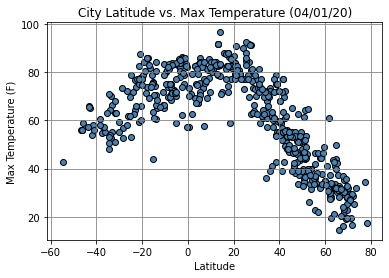

In [58]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig1.png")
plt.show()

## Latitude vs. Humidity Plot

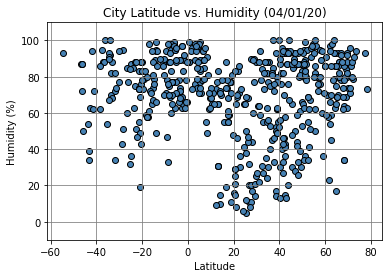

In [63]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(-10,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

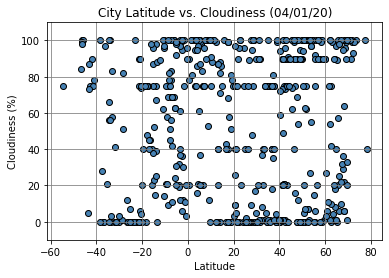

In [64]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10,110)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

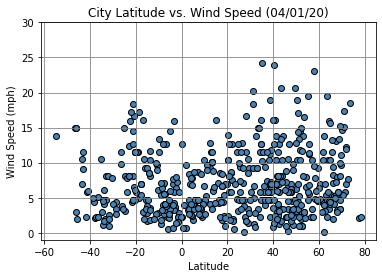

In [71]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="steelblue")
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-1,30)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="grey")
plt.savefig("fig4.png")
plt.show()

## Linear Regression

In [75]:
 # Create North and South Hemisphere DataFrames
L=0
North = weather_dataframe.query(f"Lat >= {L}")
South = weather_dataframe.query(f"Lat <= {L}")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8732260905037937


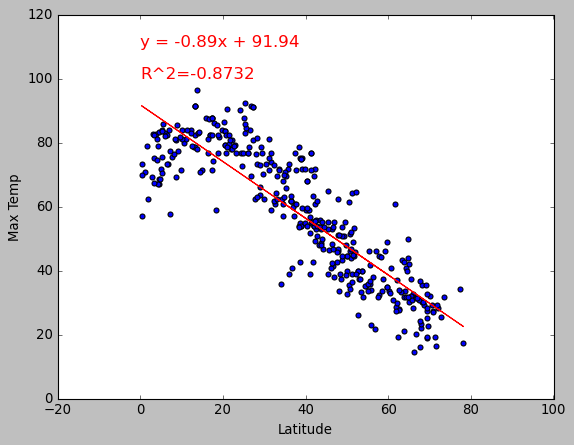

In [98]:
x_values=North['Lat']
y_values=North['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,110),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,100),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6649258605236164


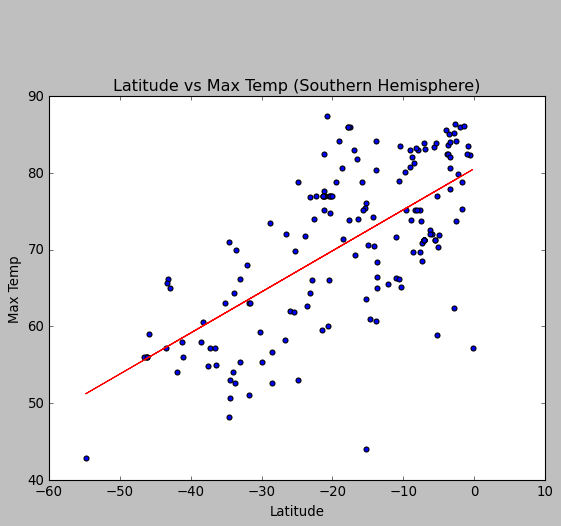

In [91]:
x_values=South['Lat']
y_values=South['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,100),fontsize=15,color="red")
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
plt.title('Latitude vs Max Temp (Southern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-30,100),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14021144788203607


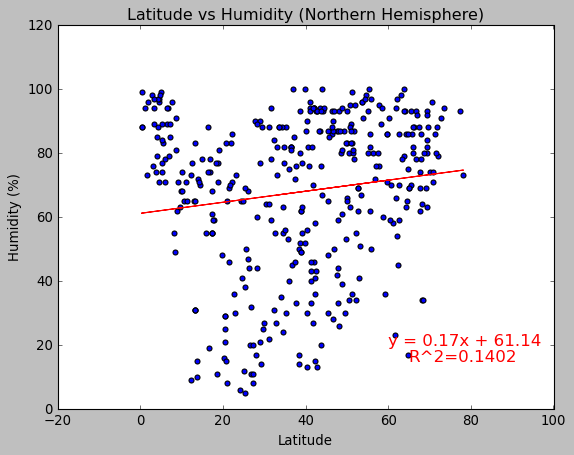

In [87]:
x_values=North['Lat']
y_values=North['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (Northern Hemisphere)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(65,15),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1333748214726902


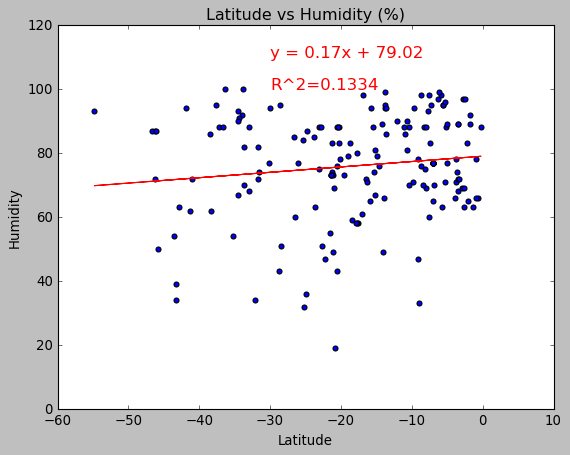

In [101]:
x_values=South['Lat']
y_values=South['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,110),fontsize=15,color="red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.title('Latitude vs Humidity (%)')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-30,100),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.015218169956748955


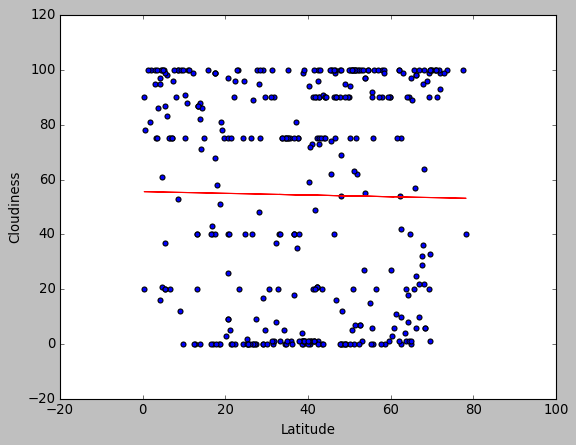

In [104]:
x_values=North['Lat']
y_values=North['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,110),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-30,100),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09688416068140251


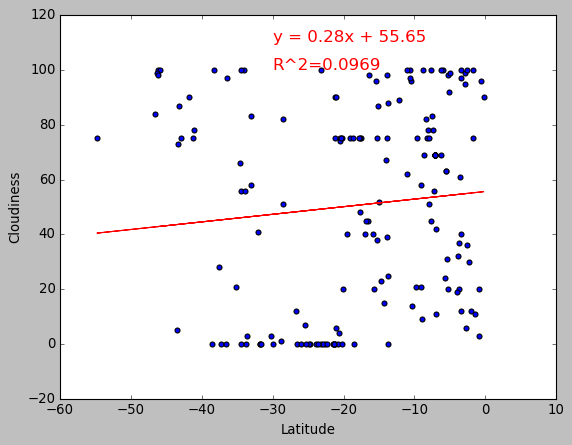

In [105]:
x_values=South['Lat']
y_values=South['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,110),fontsize=15,color="red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(-30,100),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.14423621466195524


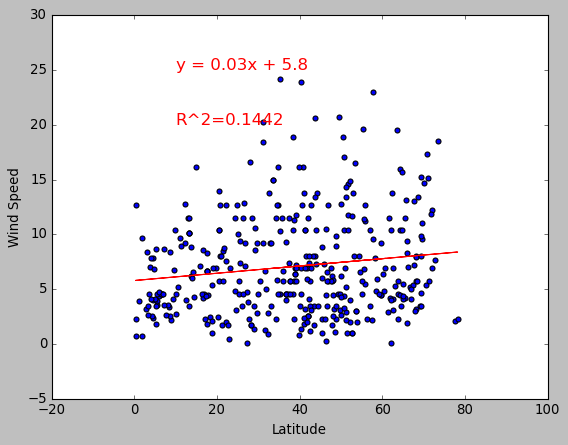

In [112]:
x_values=North['Lat']
y_values=North['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(10,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1777972612641647


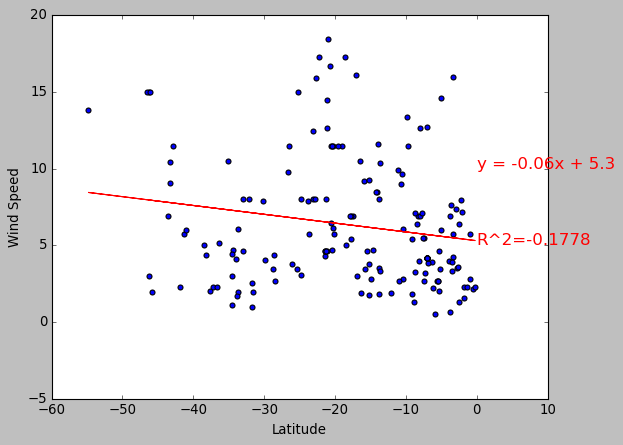

In [119]:
x_values=South['Lat']
y_values=South['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.style.use("classic")
R2="R^2="+str(round(rvalue,4))
plt.annotate(R2,(0,5),fontsize=15,color="red")
print(f"The r-value is: {rvalue}")
plt.show()